In [1]:
from visual_behavior.data_access import loading
import pandas as pd
import visual_behavior.database as db
from visual_behavior.translator.foraging2 import data_to_change_detection_core
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib notebook

In [3]:
from allensdk.brain_observatory.behavior.behavior_session import BehaviorSession
behavior_session_id = 947052898
session = BehaviorSession.from_lims(behavior_session_id)
session.stimulus_presentations

,duration,end_frame,image_index,image_name,image_set,index,omitted,orientation,phase,spatial_frequency,start_frame,start_time,stop_time
stimulus_presentations_id,,,,,,,,,,,,,
0,2.468740,1345.0,1,gratings_90.0,grating,0,False,90.0,0.25,0.04,1197.0,-15.733854,-13.265114
1,12.277193,2081.0,2,gratings_180.0,grating,1,False,180.0,0.25,0.04,1345.0,-13.265114,-0.987921
2,32.511605,3238.0,3,gratings_270.0,grating,2,False,270.0,0.25,0.04,2081.0,-0.987921,31.523684
3,132.213349,7199.0,0,gratings_0.0,grating,3,False,0.0,0.25,0.04,3238.0,31.523684,163.737033
4,72.178662,9361.0,1,gratings_90.0,grating,4,False,90.0,0.25,0.04,7199.0,163.737033,235.915696
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,7.406403,108769.0,0,gratings_0.0,grating,101,False,0.0,0.25,0.04,108547.0,3545.837519,3553.243923
102,7.706613,109000.0,1,gratings_90.0,grating,102,False,90.0,0.25,0.04,108769.0,3553.243923,3560.950536
103,7.306264,109219.0,0,gratings_0.0,grating,103,False,0.0,0.25,0.04,109000.0,3560.950536,3568.256800


In [4]:
session.stimulus_timestamps

array([ -35.81721413,  -35.80064963,  -35.78397654, ..., 3610.09261654,
       3610.12605675, 3610.15939765])

In [5]:
pkl_path = db.get_pkl_path(behavior_session_id)
data = pd.read_pickle(pkl_path)
core_data = data_to_change_detection_core(data)
core_data['visual_stimuli']

,orientation,image_name,image_category,frame,end_frame,time,duration
0,90,NaN,NaN,1197,1345,20.083360,2.468740
1,180,NaN,NaN,1345,2081,22.552100,12.277193
2,270,NaN,NaN,2081,3238,34.829293,32.511605
3,0,NaN,NaN,3238,7199,67.340898,132.213349
4,90,NaN,NaN,7199,9361,199.554247,72.178662
...,...,...,...,...,...,...,...
101,0,NaN,NaN,108547,108769,3581.654733,7.406403
102,90,NaN,NaN,108769,109000,3589.061137,7.706613
103,0,NaN,NaN,109000,109219,3596.767750,7.306264
104,270,NaN,NaN,109219,109447,3604.074014,7.606522


In [6]:
core_data['time']

array([0.00000000e+00, 1.65645035e-02, 3.32375985e-02, ...,
       3.64590983e+03, 3.64594327e+03, 3.64597661e+03])

In [7]:
events = [trial["events"] for trial
              in data["items"]["behavior"]["trial_log"]]
events

[[['trial_start', '', 24.675835252168934, 1196],
  ['initial_blank', 'enter', 24.67590775684118, 1196],
  ['initial_blank', 'exit', 24.68287846859538, 1196],
  ['pre_change', 'enter', 24.682916541825097, 1196],
  ['pre_change', 'exit', 26.9326746112806, 1325],
  ['stimulus_window', 'enter', 26.9327484402391, 1325],
  ['stimulus_changed', '', 27.24987824843279, 1344],
  ['auto_reward', '', 27.249936517027837, 1344],
  ['response_window', 'enter', 27.40095812110267, 1353],
  ['response_window', 'exit', 28.26712773899642, 1405],
  ['miss', '', 28.26729824085125, 1405],
  ['stimulus_window', 'exit', 31.75341028540024, 1614],
  ['no_lick', 'exit', 31.753472857925605, 1614],
  ['trial_end', '', 31.753505302938756, 1614]],
 [['trial_start', '', 31.753942317401616, 1614],
  ['initial_blank', 'enter', 31.753979066345085, 1614],
  ['initial_blank', 'exit', 31.754011180286675, 1614],
  ['pre_change', 'enter', 31.754037666011698, 1614],
  ['early_response', '', 32.60500447774289, 1665],
  ['abort'

In [8]:
data.keys()

dict_keys(['comp_id', 'unpickleable', 'items', 'start_time', 'script', 'rig_id', 'threads', 'stop_time', 'session_uuid', 'platform_info'])

In [9]:
data['start_time']

datetime.datetime(2019, 9, 16, 9, 17, 34, 399000)

In [10]:
pkl_path = db.get_pkl_path(855964272)
data = pd.read_pickle(pkl_path)
data['items']['behavior']['stimuli']['grating']['set_log']

[('Ori', 90, 5.112622586672602, 0),
 ('Ori', 0, 27.765477078561307, 1275),
 ('Ori', 270, 33.60379352392144, 1450),
 ('Ori', 180, 40.27627054282908, 1650),
 ('Ori', 270, 46.64804595769465, 1841),
 ('Ori', 0, 54.22113933363652, 2068),
 ('Ori', 90, 63.529060313701294, 2347),
 ('Ori', 180, 69.73430547421775, 2533),
 ('Ori', 90, 76.03968347638452, 2722),
 ('Ori', 0, 85.31423657103052, 3000),
 ('Ori', 270, 91.61937724142221, 3189),
 ('Ori', 0, 98.79205182299668, 3404),
 ('Ori', 270, 105.6645187071961, 3610),
 ('Ori', 180, 113.30430038762051, 3839),
 ('Ori', 270, 119.30934048065457, 4019),
 ('Ori', 0, 125.4813601548173, 4204),
 ('Ori', 90, 131.48646214654403, 4384),
 ('Ori', 180, 142.8624056205296, 4725),
 ('Ori', 90, 150.50207857734353, 4954),
 ('Ori', 180, 158.710509756581, 5201),
 ('Ori', 270, 165.98174148925048, 5418),
 ('Ori', 180, 171.88668754758663, 5595),
 ('Ori', 90, 178.12528006753053, 5782),
 ('Ori', 180, 184.23181605632846, 5966),
 ('Ori', 270, 192.67075123204057, 6218),
 ('Ori', 

In [11]:
data['items']['behavior']['stimuli']['grating']['set_log'][0][2]

5.112622586672602

In [12]:
events = [trial["events"] for trial
              in data["items"]["behavior"]["trial_log"]]

In [13]:
from itertools import chain
import scipy.stats as sps
trial_by_frame = list(chain(
        [event[i][-2:] for event in events for i in [0, -1]]))

In [14]:
times = [trials[0] for trials in trial_by_frame]
frames = [trials[1] for trials in trial_by_frame]

time_to_first_vsync = sps.linregress(frames, times).intercept

<IPython.core.display.Javascript object>


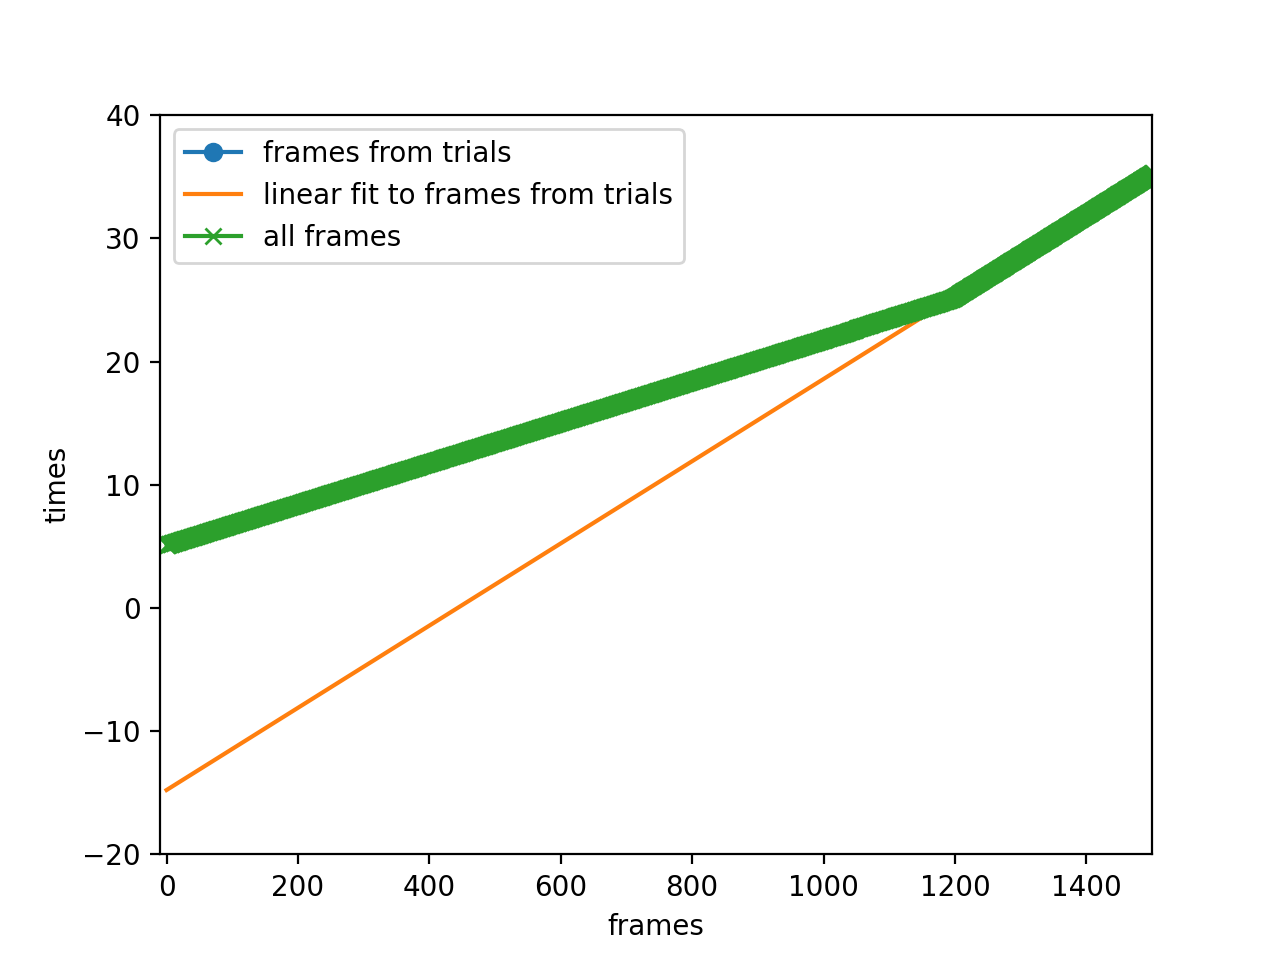

(-20.0, 40.0)

In [15]:
fig,ax = plt.subplots()
ax.plot(frames, times, marker = 'o')

linregress = sps.linregress(frames, times)

ax.plot(
    [0]+frames,
    linregress.slope*np.array([0]+frames) + linregress.intercept
)

ax.set_xlabel('frames')
ax.set_ylabel('times')

alternate_times = (
    np.hstack((0, data['items']['behavior']['intervalsms'])).cumsum() / 1000.0 + 
    data['items']['behavior']['stimuli']['grating']['set_log'][0][2]
)
alternate_frames = np.arange(len(alternate_times))

ax.plot(
    alternate_frames,
    alternate_times,
    marker = 'x'
)

ax.legend(['frames from trials','linear fit to frames from trials','all frames'])

ax.set_xlim(-10,1500)
ax.set_ylim(-20,40)

In [16]:
sps.linregress(frames, times)

LinregressResult(slope=0.03336145225988811, intercept=-14.774292055555463, rvalue=0.9999999993060623, pvalue=0.0, stderr=7.956558663088755e-08)

In [17]:
events[0]

[['trial_start', '', 25.114267231730103, 1196],
 ['initial_blank', 'enter', 25.11437755893365, 1196],
 ['initial_blank', 'exit', 25.114494621228108, 1196],
 ['pre_change', 'enter', 25.11463766173038, 1196],
 ['pre_change', 'exit', 27.398031364997667, 1264],
 ['stimulus_window', 'enter', 27.398185951370078, 1264],
 ['response_window', 'enter', 27.76503865621466, 1275],
 ['response_window', 'exit', 27.765177206656322, 1275],
 ['miss', '', 27.765376052197595, 1275],
 ['stimulus_changed', '', 27.765724031894823, 1275],
 ['auto_reward', '', 27.765790741366736, 1275],
 ['stimulus_window', 'exit', 31.268047958978805, 1380],
 ['no_lick', 'exit', 31.268268613385896, 1380],
 ['trial_end', '', 31.26837605412191, 1380]]

In [18]:
times

[25.114267231730103,
 31.26837605412191,
 31.269009152667834,
 37.13994107757606,
 37.14058508055489,
 43.778841743965195,
 43.779478049697275,
 50.18425348573027,
 50.18492731554029,
 57.72398923924903,
 57.724624582825264,
 67.03192401021424,
 67.03255646732295,
 73.27045046212345,
 73.27105918605464,
 79.54407539709776,
 79.5447219658255,
 88.85026481736037,
 88.8509559659756,
 95.15557578933662,
 95.15620535997778,
 102.32833087128343,
 102.328943443838,
 109.16761877332827,
 109.16824930612528,
 116.84047584379464,
 116.84110220724965,
 122.84549958017934,
 122.84611888782482,
 128.98399934829976,
 128.98462731534786,
 134.98902051893555,
 134.98963661939487,
 146.4005534961857,
 146.40122347737233,
 154.00510263316397,
 154.0057229029653,
 162.24516853442498,
 162.2457910492566,
 169.51793907500902,
 169.51856062768482,
 175.38951147499134,
 175.39013142407404,
 181.66143146980852,
 181.66205430535877,
 187.7665036988478,
 187.7671300623028,
 196.20698024822337,
 196.207764084518

In [19]:
data['items']['behavior']['intervalsms'][:1196].max()

59.665528970072046

In [20]:
data['items']['behavior']['intervalsms'][:1196].mean()

16.736529299552394

In [21]:
np.sort(data['items']['behavior']['intervalsms'][:1196])[::-1][:10]

array([59.66552897, 33.36980974, 23.77166375, 17.35248066, 16.77807362,
       16.77326285, 16.76203769, 16.75626475, 16.75562332, 16.75466118])

In [22]:
np.sort(data['items']['behavior']['intervalsms'][1196:1400])[::-1][:10]

array([33.47532616, 33.41471034, 33.41406889, 33.40861668, 33.40669237,
       33.40476807, 33.40316447, 33.400278  , 33.39963657, 33.39931584])

<IPython.core.display.Javascript object>


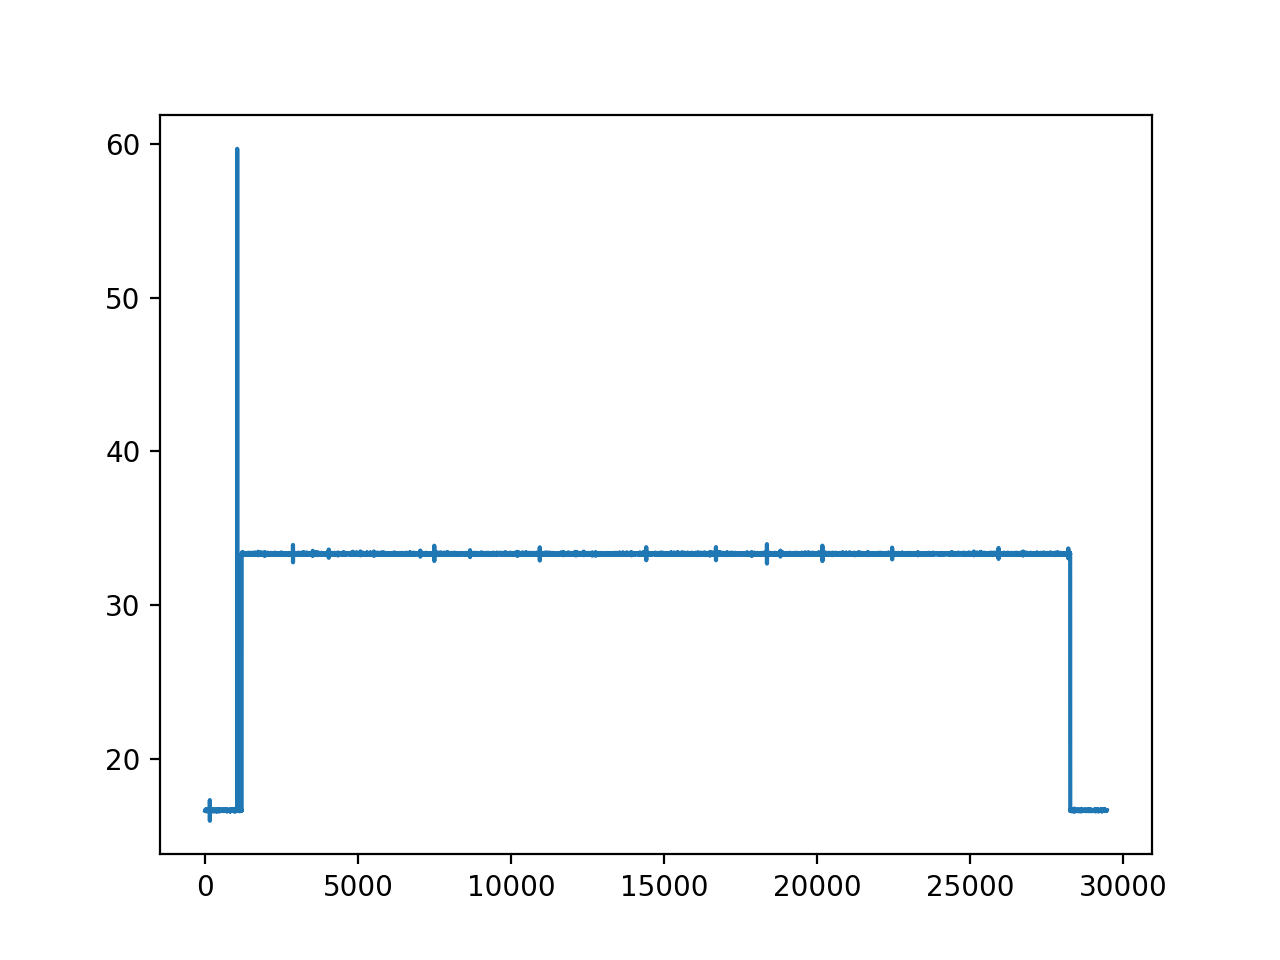

In [23]:
fig,ax = plt.subplots()
ax.plot(data['items']['behavior']['intervalsms'])


In [24]:
session.trials

,lick_times,reward_time,reward_volume,hit,false_alarm,miss,stimulus_change,aborted,go,catch,...,correct_reject,start_time,stop_time,trial_length,response_time,change_frame,change_time,response_latency,initial_image_name,change_image_name
trials_id,,,,,,,,,,,,,,,,,,,,,
0,"[26.3859740856376, 26.552752378610194, 26.7529...",NaN,0.005,False,False,False,True,False,False,False,...,False,24.675835,31.753505,7.077670,26.385974,1344.0,-13.265114,39.651088,gratings_90,gratings_180
1,"[31.890714864867505, 32.12427459597052, 32.257...",NaN,0.000,False,False,False,False,True,False,False,...,False,31.753942,33.388230,1.634288,NaN,NaN,NaN,NaN,gratings_180,gratings_180
2,"[35.05995103313285, 35.19334638722171]",NaN,0.000,False,False,False,False,True,False,False,...,False,33.388593,35.356622,1.968029,NaN,NaN,NaN,NaN,gratings_180,gratings_180
3,"[35.36023227839428, 35.52696091062785, 36.7947...",36.369206,0.005,False,False,False,True,False,False,False,...,False,35.356987,44.047466,8.690479,35.360232,2080.0,-0.987921,36.348154,gratings_180,gratings_270
4,[],NaN,0.000,False,False,False,False,True,False,False,...,False,44.047894,45.181715,1.133821,NaN,NaN,NaN,NaN,gratings_270,gratings_270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,[],NaN,0.000,False,False,True,True,False,True,False,...,False,3590.872492,3598.277495,7.405002,NaN,108768.0,3553.243923,inf,gratings_0,gratings_90
1224,[],NaN,0.000,False,False,True,True,False,True,False,...,False,3598.277848,3605.984205,7.706356,NaN,108999.0,3560.950536,inf,gratings_90,gratings_0
1225,[],NaN,0.000,False,False,True,True,False,True,False,...,False,3605.984556,3613.290360,7.305804,NaN,109218.0,3568.256800,inf,gratings_0,gratings_270


In [34]:
session.licks[50:100]

,time
50,12.406897
51,12.540442
52,14.408676
53,14.542118
54,14.742247
55,14.875684
56,15.042499
57,15.242721
58,15.409531
59,18.312160


In [36]:
session.stimulus_timestamps[3084]

26.3859740856376

In [35]:
core_data['licks'].loc[65]

frame    3084.000000
time       62.203188
Name: 65, dtype: float64

<IPython.core.display.Javascript object>


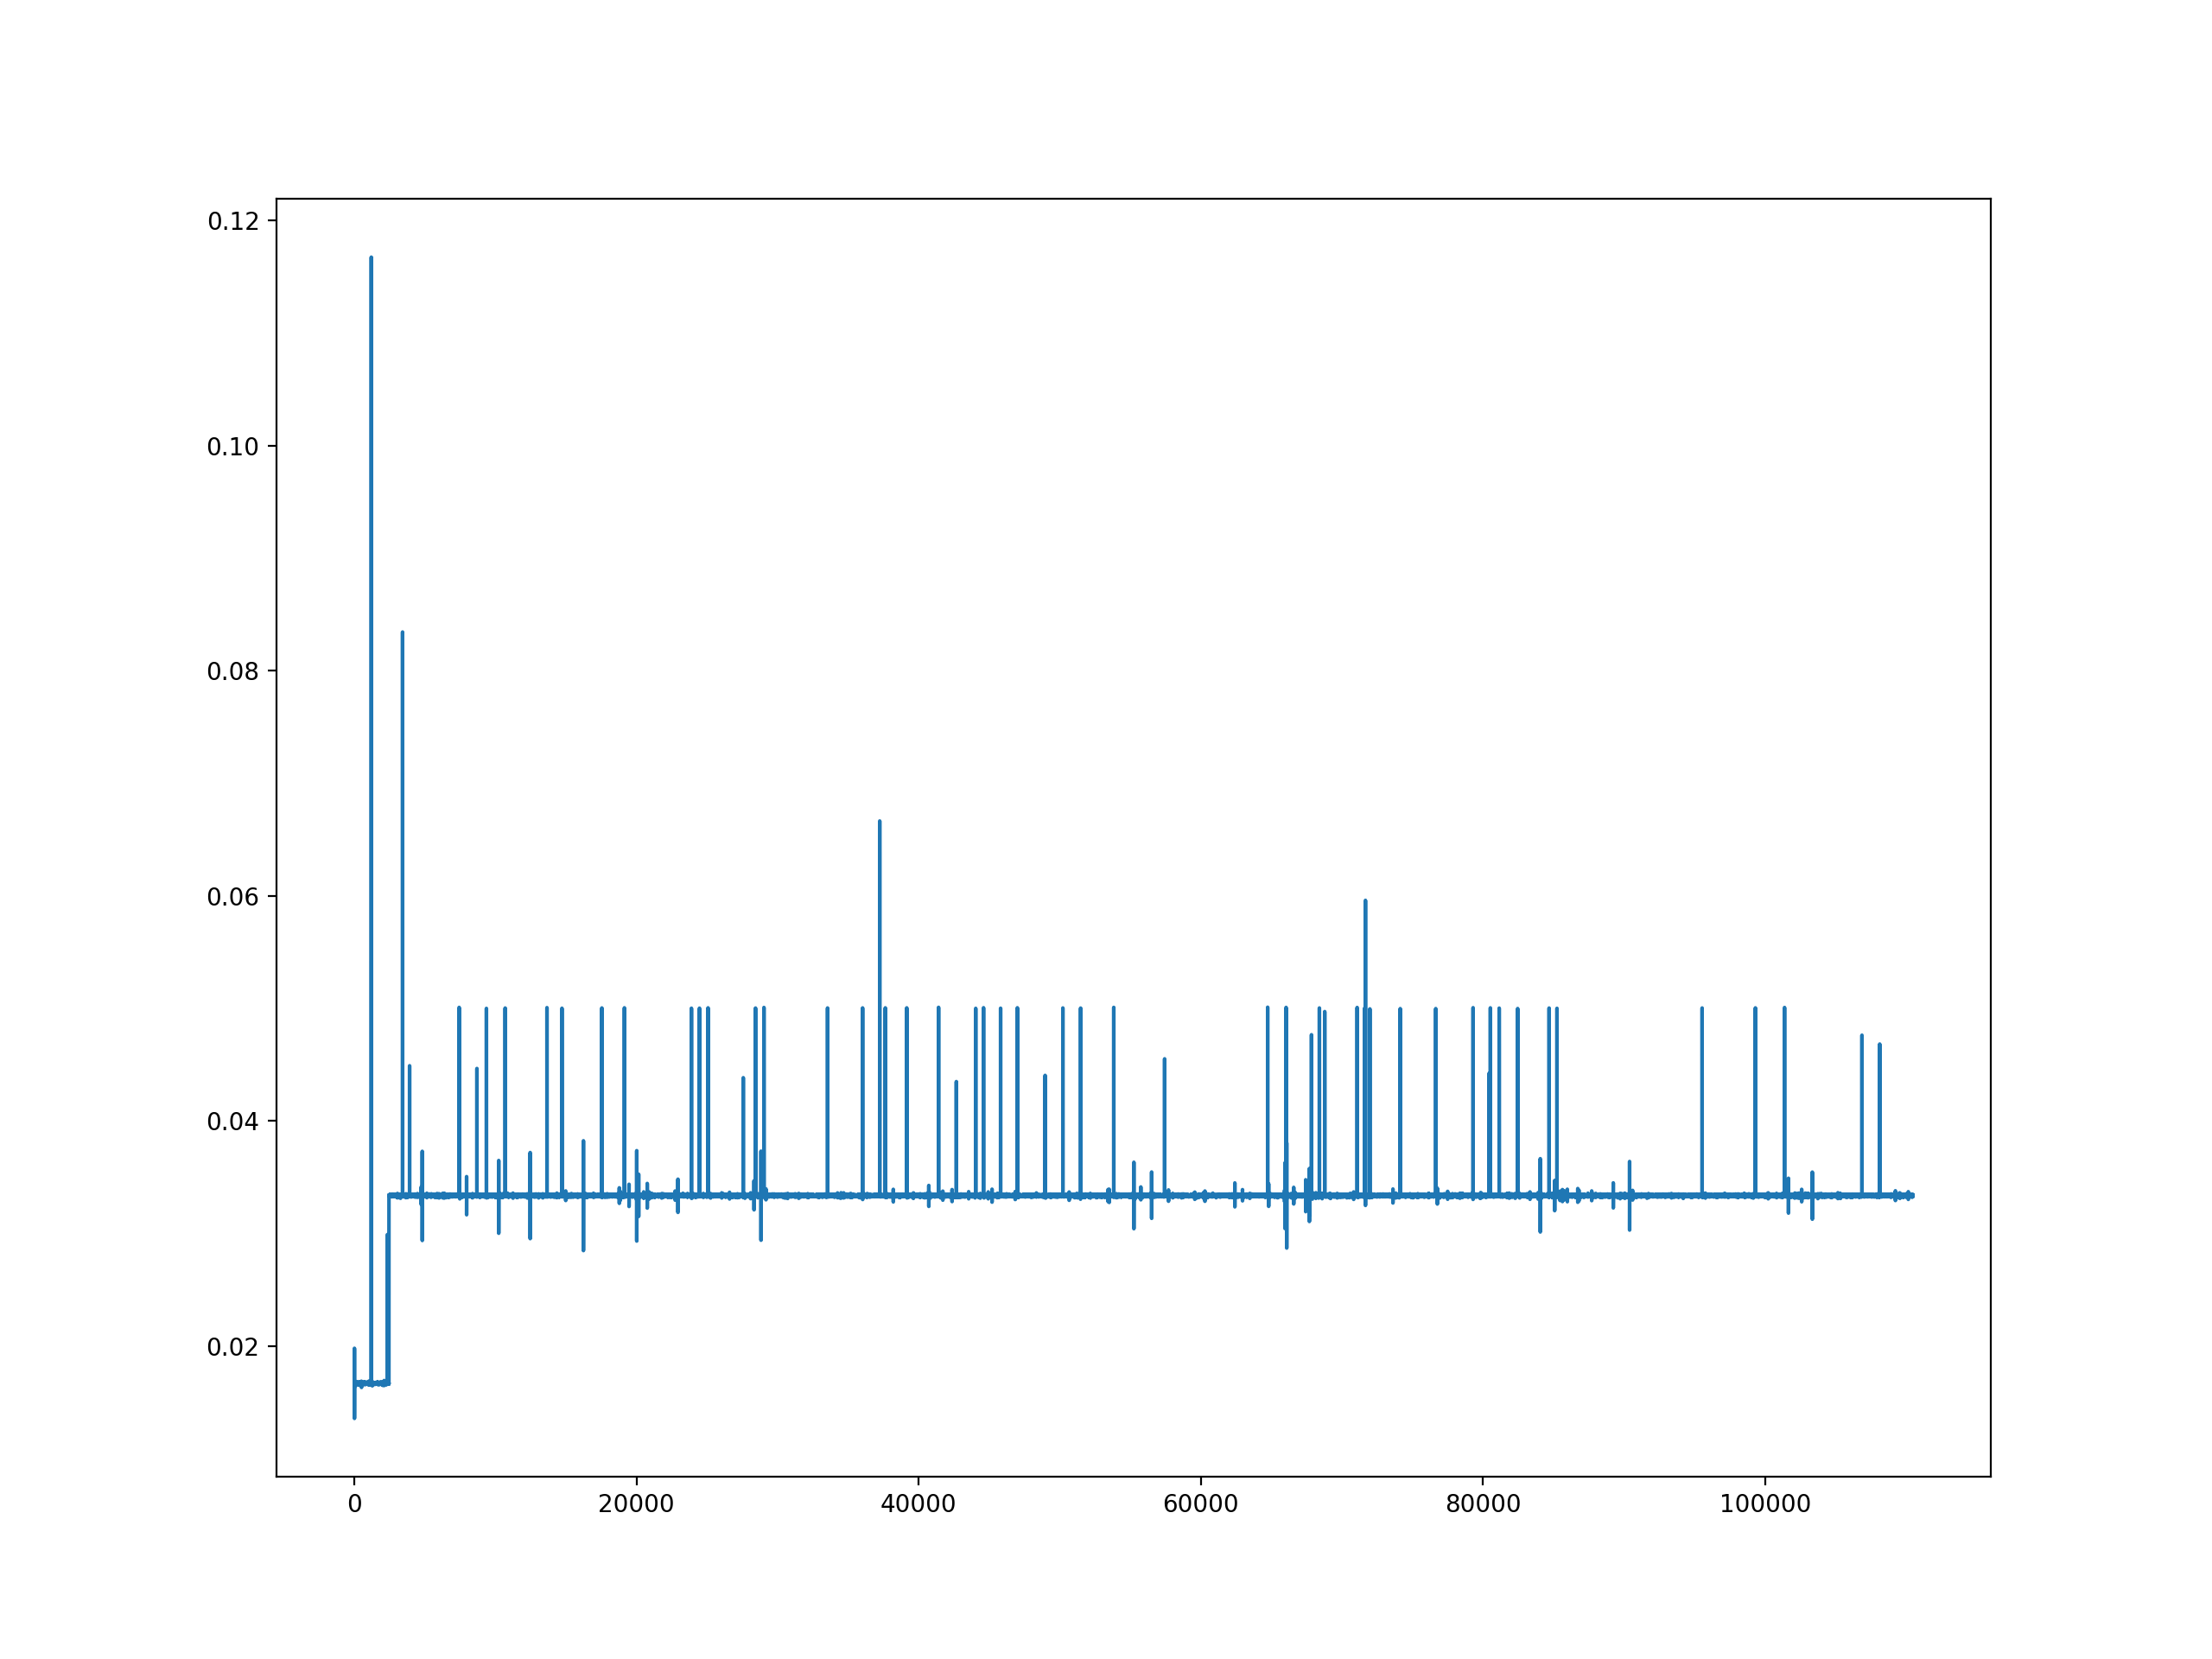

In [38]:
fig,ax=plt.subplots()
ax.plot(np.diff(session.stimulus_timestamps))